In [156]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline

### params

In [157]:
mu = -0.2
t1 = 10 # czas pierwszej linii
cap1 = 100 # przepustowosc pierwszej
cap2 = 999999 # przepustowosc drugiej
q = 200 # potok

#### calc betas

In [158]:
betas = [1,1.3,1.6,1.8]
steps = [0.5,0.7,0.8,]
def get_beta(q,cap):
    ratio = q/float(cap)
    for i in range(3):
        if ratio<steps[i]:
            return betas[i]  
    return betas[-1]

### calc probs

In [159]:
def p(row):
    t2 = row.t
    q = row.q
    u1 = t1*get_beta(q,cap1)
    u2 = t2*betas[0]
    return (math.exp(mu*u1))/((math.exp(mu*u1)+math.exp(mu*u2)))

def p_array(t2,q):
    u1 = t1*get_beta(q,cap1)
    u2 = t2*betas[0]
    return (math.exp(mu*u1))/((math.exp(mu*u1)+math.exp(mu*u2)))

### obliczenia

In [160]:
n=10 # n steps
m=1 # multiplier (10 -> m*10)
t_range = [t0*(1+m*_/n) for _ in range(n+1)] # zakres czasow drugiej linii
q_range =  [m*q*(_/n) for _ in range(n+1)] # zakres liczby pasazerow na pierwszej linii
df = pd.DataFrame([[t,q] for t in t_range for q in q_range], columns = ['t','q'] )
df['p']=df.apply(p,axis=1)
df = df.pivot(index='t',columns='q',values='p')

In [161]:
df

q,0.0,20.0,40.0,60.0,80.0,100.0,120.0,140.0,160.0,180.0,200.0
t,,,,,,,,,,,
10.0,0.500000,0.500000,0.500000,0.354344,0.167982,0.167982,0.167982,0.167982,0.167982,0.167982,0.167982
11.0,0.549834,0.549834,0.549834,0.401312,0.197816,0.197816,0.197816,0.197816,0.197816,0.197816,0.197816
12.0,0.598688,0.598688,0.598688,0.450166,0.231475,0.231475,0.231475,0.231475,0.231475,0.231475,0.231475
13.0,0.645656,0.645656,0.645656,0.500000,0.268941,0.268941,0.268941,0.268941,0.268941,0.268941,0.268941
14.0,0.689974,0.689974,0.689974,0.549834,0.310026,0.310026,0.310026,0.310026,0.310026,0.310026,0.310026
15.0,0.731059,0.731059,0.731059,0.598688,0.354344,0.354344,0.354344,0.354344,0.354344,0.354344,0.354344
16.0,0.768525,0.768525,0.768525,0.645656,0.401312,0.401312,0.401312,0.401312,0.401312,0.401312,0.401312
17.0,0.802184,0.802184,0.802184,0.689974,0.450166,0.450166,0.450166,0.450166,0.450166,0.450166,0.450166
18.0,0.832018,0.832018,0.832018,0.731059,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000


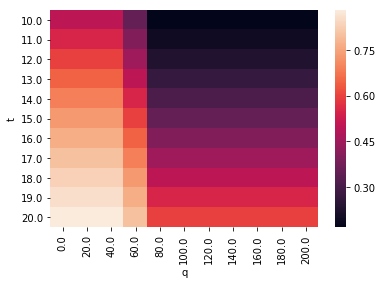

In [162]:
sns.heatmap(df)

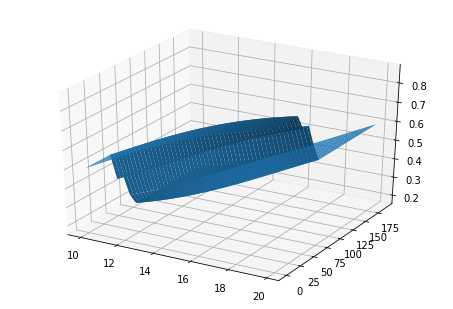

In [165]:
import numpy as np
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 

fig = plt.figure()
ax = Axes3D(fig)
t = np.arange(10, 20, 0.1)
q = np.arange(0, 200, 10)
X, Y = np.meshgrid(t, q)
zs = np.array([p_array(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)